# Imports

In [14]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np

In [5]:
import nfl_data_py as nfl

# Grabbing Data

In [6]:
seasons = range(2016, 2023 + 1)
df_pbp = nfl.import_pbp_data(seasons) 

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


# Grabbing Only the Running Plays

In [9]:
df_run_plays = df_pbp.query('play_type == "run" & rusher_id.notnull() & season_type == "REG"').reset_index()

,index,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,2,58.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,I_FORM,"2 RB, 1 TE, 2 WR",8.0,"4 DL, 3 LB, 4 DB",NaN,38540;41302;40078;35553;38582;43295;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0
1,4,109.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,SHOTGUN,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",NaN,40078;38540;41302;35553;43295;38582;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0
2,6,154.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,I_FORM,"1 RB, 2 TE, 2 WR",8.0,"4 DL, 3 LB, 4 DB",NaN,41302;38540;43295;38582;40053;43369;40116;3316...,00-0032965;00-0029893;00-0026223;00-0031558;00...,00-0031171;00-0029542;00-0029566;00-0030073;00...,11.0,11.0
3,10,240.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BUF,away,...,SHOTGUN,"6 OL, 1 RB, 2 TE, 1 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,34479;40111;41277;37249;41230;36089;37100;3567...,00-0027004;00-0030046;00-0028112;00-0031325;00...,00-0031170;00-0027560;00-0027965;00-0031296;00...,11.0,10.0
4,19,450.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"3 DL, 3 LB, 5 DB",NaN,41302;38540;37977;43295;38582;40494;37109;4025...,00-0028497;00-0032965;00-0029893;00-0026223;00...,00-0031171;00-0029542;00-0029566;00-0030041;00...,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97165,373183,3989.0,2023_12_WAS_DAL,2023112301,DAL,WAS,REG,12,WAS,away,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"5 DL, 2 LB, 4 DB",NaN,53504;41475;53511;54695;53480;53513;42346;4170...,00-0031095;00-0036626;00-0037092;00-0036618;00...,00-0036942;00-0036982;00-0032052;00-0034743;00...,11.0,11.0
97166,373184,4011.0,2023_12_WAS_DAL,2023112301,DAL,WAS,REG,12,WAS,away,...,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"4 DL, 2 LB, 5 DB",NaN,41475;54695;53480;52490;42346;46091;41707;5514...,00-0031095;00-0037092;00-0036618;00-0030869;00...,00-0036366;00-0032052;00-0034743;00-0037561;00...,11.0,11.0
97167,373185,4033.0,2023_12_WAS_DAL,2023112301,DAL,WAS,REG,12,WAS,away,...,SHOTGUN,"1 RB, 2 TE, 2 WR",8.0,"5 DL, 2 LB, 4 DB",NaN,53504;41475;53511;54695;53480;53513;42346;4170...,00-0031095;00-0036626;00-0037092;00-0036618;00...,00-0036942;00-0036982;00-0032052;00-0034743;00...,11.0,11.0
97168,373186,4062.0,2023_12_WAS_DAL,2023112301,DAL,WAS,REG,12,WAS,away,...,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,"5 DL, 2 LB, 4 DB",NaN,53504;41475;53511;54695;53480;53513;42346;4170...,00-0031095;00-0036626;00-0037092;00-0036618;00...,00-0036942;00-0036982;00-0032052;00-0034743;00...,11.0,11.0


In [10]:
df_run_plays.loc[df_run_plays.rushing_yards.isnull(), "rushing_yards"] = 0

# Plotting the Raw Data

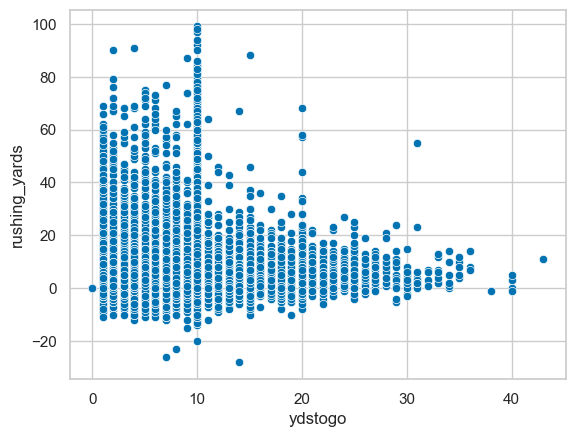

In [15]:
sns.set_theme(style="whitegrid", palette="colorblind")
sns.scatterplot(data=df_run_plays, x="ydstogo", y="rushing_yards");
plt.show();

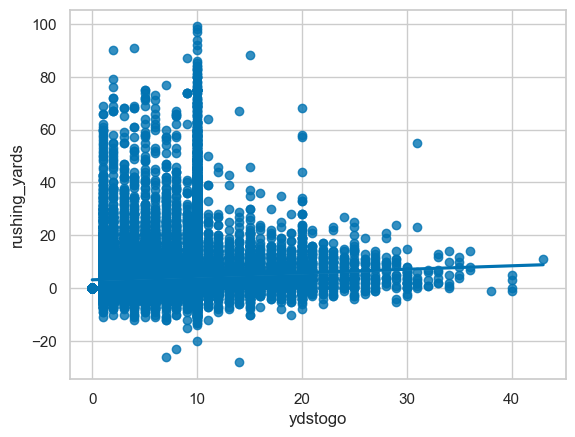

In [18]:
sns.regplot(data=df_run_plays, x="ydstogo", y="rushing_yards");
plt.show();

In [20]:
df_run_plays_avg = df_run_plays.groupby(["ydstogo"]).agg({"rushing_yards": ["mean"]})
df_run_plays_avg.columns = list(map("_".join, df_run_plays_avg.columns))
df_run_plays_avg.reset_index(inplace=True)

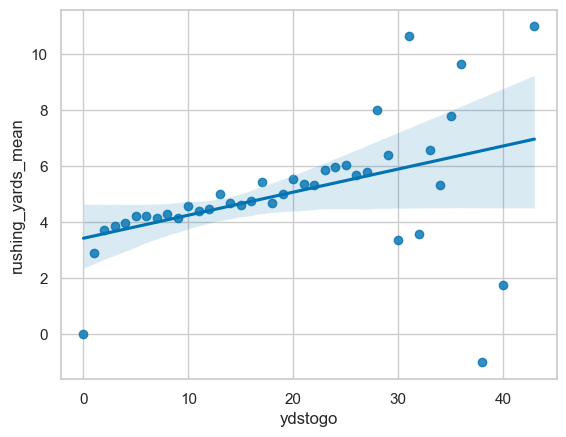

In [22]:
sns.regplot(data=df_run_plays_avg, x="ydstogo", y="rushing_yards_mean");
plt.show();

# Simple Linear Regression

*OLS* is ordinary least squared mean.

In [38]:
df_yard_to_go = smf.ols(formula='rushing_yards ~ 1 + ydstogo', data=df_run_plays)

In [39]:
print(df_yard_to_go.fit().summary())

                            OLS Regression Results                            
Dep. Variable:          rushing_yards   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     649.3
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          9.53e-143
Time:                        11:37:33   Log-Likelihood:            -3.1655e+05
No. Observations:               97170   AIC:                         6.331e+05
Df Residuals:                   97168   BIC:                         6.331e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2146      0.046     69.737      0.0

# Rushing Yards Over Expected

This dataset only counts **designed runs** for quarterbacks as run plays.

The difference between a model’s expected output and the observed data is called a **residual**. Let's grab residuals from our model above:

In [118]:
df_run_plays["ryoe"] = df_yard_to_go.fit().resid

Creating the rushing yards over expected (ryoe) data frame.

In [119]:
df_ryoe = df_run_plays.groupby(["season", "rusher_id", "rusher"]).agg({"ryoe": ["count", "sum", "mean"],
                                                                      "rushing_yards": "mean"})

In [120]:
df_ryoe.columns = list(map("_".join, df_ryoe.columns))

In [121]:
df_ryoe.reset_index(inplace=True)

In [122]:
num_carry_threshold = 125
df_ryoe = df_ryoe.rename(columns={
        "ryoe_count": "carries",
        "ryoe_sum": "total_ryoe",
        "ryoe_mean": "ryoe_per_carry",
        "rushing_yards_mean": "yards_per_carry"
    }).query(f"carries > {num_carry_threshold}")

In [123]:
df_ryoe.sort_values("total_ryoe", ascending=False)

,season,rusher_id,rusher,carries,total_ryoe,ryoe_per_carry,yards_per_carry
1974,2021,00-0036223,J.Taylor,332,420.165290,1.265558,5.454819
1428,2020,00-0032764,D.Henry,379,403.155694,1.063735,5.348285
1886,2021,00-0034791,N.Chubb,228,277.788322,1.218370,5.521930
315,2016,00-0033045,E.Elliott,322,253.517411,0.787321,5.065217
1461,2020,00-0033293,A.Jones,202,247.395739,1.224731,5.465346
...,...,...,...,...,...,...,...
414,2017,00-0029613,D.Martin,139,-197.263599,-1.419163,2.920863
120,2016,00-0029613,D.Martin,144,-197.939438,-1.374579,2.923611
670,2018,00-0027325,L.Blount,155,-246.226017,-1.588555,2.696774
1050,2019,00-0030496,L.Bell,245,-284.843854,-1.162628,3.220408


Jackson is doing this only on run plays! Not sure what it would look like on scrambles too...

In [124]:
print(df_ryoe.sort_values("total_ryoe", ascending=False).to_string())

      season   rusher_id             rusher  carries  total_ryoe  ryoe_per_carry  yards_per_carry
1974    2021  00-0036223           J.Taylor      332  420.165290        1.265558         5.454819
1428    2020  00-0032764            D.Henry      379  403.155694        1.063735         5.348285
1886    2021  00-0034791            N.Chubb      228  277.788322        1.218370         5.521930
315     2016  00-0033045          E.Elliott      322  253.517411        0.787321         5.065217
1461    2020  00-0033293            A.Jones      202  247.395739        1.224731         5.465346
1545    2020  00-0034791            N.Chubb      190  246.044222        1.294970         5.605263
1134    2019  00-0032764            D.Henry      303  234.182359        0.772879         5.082508
294     2016  00-0032780           J.Howard      252  227.506777        0.902805         5.210318
51      2016  00-0027029            L.McCoy      235  226.890118        0.965490         5.391490
1641    2020  00-003

In [125]:
print(df_ryoe.sort_values("ryoe_per_carry", ascending=False).to_string())

      season   rusher_id             rusher  carries  total_ryoe  ryoe_per_carry  yards_per_carry
1641    2020  00-0036158          J.Dobbins      135  226.770881        1.679784         5.962963
1545    2020  00-0034791            N.Chubb      190  246.044222        1.294970         5.605263
2354    2022  00-0036906          K.Herbert      129  165.176163        1.280435         5.666667
1974    2021  00-0036223           J.Taylor      332  420.165290        1.265558         5.454819
1094    2019  00-0031687          R.Mostert      137  172.386213        1.258294         5.635036
1917    2021  00-0035243          M.Sanders      138  170.362338        1.234510         5.463768
1461    2020  00-0033293            A.Jones      202  247.395739        1.224731         5.465346
1886    2021  00-0034791            N.Chubb      228  277.788322        1.218370         5.521930
1919    2021  00-0035261          T.Pollard      130  157.902567        1.214635         5.530769
86      2016  00-002

# Is RYOE a worthy metric?

In [126]:
cols_to_keep = ["season", "rusher_id", "rusher",
       "ryoe_per_carry", "yards_per_carry"]

Current df

In [127]:
df_now_ryoe = df_ryoe[cols_to_keep].copy()

Last year df

In [128]:
df_last_ryoe = df_ryoe[cols_to_keep].copy()
df_last_ryoe.rename(columns= {
        'ryoe_per_carry': "ryoe_per_carry_last",
        'yards_per_carry': "yards_per_carry_last"
    }, inplace=True)

Add one so that the previous season can be used to compare with the current one. For example, if last year was 2016, adding 1 to make the year 2017 allows you to compare 2016 (now 2017 last) with 2017 current.

In [129]:
df_last_ryoe["season"] += 1

Merge the two dfs together

In [130]:
df_lag_ryoe = df_now_ryoe.merge(df_last_ryoe, how='inner', on=['rusher_id', 'rusher', 'season'])

Let's take a look at any potential correlation:

In [131]:
df_lag_ryoe[["yards_per_carry_last", "yards_per_carry"]].corr()

,yards_per_carry_last,yards_per_carry
yards_per_carry_last,1.000000,0.360099
yards_per_carry,0.360099,1.000000


In [132]:
df_lag_ryoe[["ryoe_per_carry_last", "ryoe_per_carry"]].corr()

,ryoe_per_carry_last,ryoe_per_carry
ryoe_per_carry_last,1.000000,0.367846
ryoe_per_carry,0.367846,1.000000


In [133]:
df_lag_ryoe

,season,rusher_id,rusher,ryoe_per_carry,yards_per_carry,ryoe_per_carry_last,yards_per_carry_last
0,2017,00-0023500,F.Gore,-0.645134,3.681992,-0.393146,3.897338
1,2017,00-0026153,J.Stewart,-0.826331,3.434343,-0.524521,3.779817
2,2017,00-0027029,L.McCoy,-0.349722,3.965157,0.965490,5.391490
3,2017,00-0027325,L.Blount,0.096977,4.402299,-0.397071,3.882943
4,2017,00-0027966,M.Ingram,0.605525,4.886957,0.746775,5.014423
...,...,...,...,...,...,...,...
136,2023,00-0037197,I.Pacheco,0.011899,4.234177,0.613649,4.882353
137,2023,00-0037256,R.White,-0.702768,3.583333,-0.528580,3.700000
138,2023,00-0037263,T.Allgeier,-0.792407,3.426471,0.678255,4.905213
139,2023,00-0037746,B.Robinson,-0.296389,3.967532,-0.370721,3.887805
